In [36]:
using DifferentialEquations
function lotka_volterra!(du, u, p, t)
    du[1] = p[1] * u[1] - p[2] * u[1] * u[2]
    du[2] = p[3] * u[1] * u[2] - p[4] * u[2]
end

lotka_volterra! (generic function with 1 method)

In [39]:
u0 = [1.0, 1.0]
tspan = (0.0, 100.0)
p0 = [0.5, 0.2, 0.1, 0.3]
prob = ODEProblem(lotka_volterra!, u0, tspan, p0)
sol = solve(prob, maxiters=150000)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 62-element Array{Float64,1}:
   0.0
   0.13146056056345257
   0.8086978211712018
   1.900088064091591
   3.1271948844748136
   4.619710559216692
   6.013662017266936
   7.499284090137049
   8.732332105367703
   9.997677027834301
  11.10131248279335
  12.3878436123559
  13.903518583148362
   ⋮
  80.88700406131227
  82.45806248056353
  83.75999804769721
  85.2036518537788
  86.39953549062133
  88.04560415563374
  89.63507465982825
  91.9497521360495
  94.32473018495008
  96.78729504180843
  99.21955237758688
 100.0
u: 62-element Array{Array{Float64,1},1}:
 [1.0, 1.0]
 [1.0405802982671435, 0.9743079061710438]
 [1.2898138884824557, 0.8601139469082119]
 [1.872689800681672, 0.7349971642695083]
 [2.9135028934977165, 0.6788320702069358]
 [4.9770087432033066, 0.7720576056429449]
 [7.668550109724637, 1.2213521901398283]
 [9.180334980362964, 2.8714753859852675]
 [6.195121398261971, 5.311693106538365]
 [2.576021875918578, 6

In [43]:
using Plots

┌ Warning: Attribute alias `zlabel` detected in the user recipe defined for the signature (::Array{Float64,2}, ::Array{Complex{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `zguide`.
└ @ Plots /home/tomosoeoc/.julia/packages/Plots/jpF9l/src/pipeline.jl:15
┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::Array{Float64,2}, ::Array{Complex{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots /home/tomosoeoc/.julia/packages/Plots/jpF9l/src/pipeline.jl:15


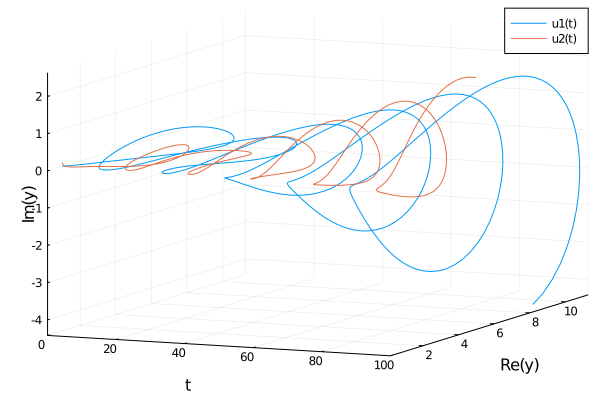

In [44]:
plot(sol)

In [46]:
using Random
struct MyQuaternion{T} <: Number
    a :: T
    b :: T
    c :: T
    d :: T
end

Base.:+(a :: MyQuaternion{T}, b :: MyQuaternion{T}) where {T} = MyQuaternion{T}( a.a + b.a, a.b + b.b, a.c + b.c, a.d + b.d)
Base.:*(a :: MyQuaternion{T}, b :: MyQuaternion{T}) where {T} = MyQuaternion{T}( a.a * b.a - a.b * b.b - a.c * b.c - a.d * b.d,
                                                                                     a.a * b.b + a.b * b.a + a.c * b.d - a.d * b.c,
                                                                                     a.a * b.c + a.c * b.a + a.d * b.b - a.b * b.d,
                                                                                     a.a * b.d + a.d * b.a + a.b * b.c - a.c * b.b)
Base.zero(::Type{MyQuaternion{T}}) where {T} = MyQuaternion{T}(zero(T),zero(T),zero(T),zero(T))
Random.rand(rng::AbstractRNG, ::Random.SamplerType{MyQuaternion{T}}) where T = MyQuaternion{T}(rand(T), rand(T), rand(T), rand(T))
Base.promote_rule(::Type{S}, ::Type{MyQuaternion{T}}) where {T, S} = MyQuaternion{promote_type(T, S)}
Base.convert(::Type{MyQuaternion{T}}, x::S) where {T, S<:Real} = MyQuaternion{promote_type(T, S)}(x, zero(promote_type(T, S)), zero(promote_type(T, S)), zero(promote_type(T, S)))
Base.real(x::MyQuaternion) = x.a
# clever implementatoin copied from julia base
# https://github.com/JuliaLang/julia/blob/44fa15b1502a45eac76c9017af94332d4557b251/base/complex.jl#L3-L10
function Base.show(io::IO, z::MyQuaternion)
    r = z.a
    i = z.b
    j = z.c
    k = z.d
    compact = get(io, :compact, false)
    Base.show(io, r)
    if signbit(i) && !isnan(i)
        print(io, compact ? "-" : " - ")
        Base.show(io, -i)
    else
        print(io, compact ? "+" : " + ")
        Base.show(io, i)
    end
    print(io, "i")
    if signbit(j) && !isnan(j)
        print(io, compact ? "-" : " - ")
        Base.show(io, -j)
    else
        print(io, compact ? "+" : " + ")
        Base.show(io, j)
    end
    print(io, "j")
    if signbit(k) && !isnan(k)
        print(io, compact ? "-" : " - ")
        Base.show(io, -k)
    else
        print(io, compact ? "+" : " + ")
        Base.show(io, k)
    end
    print(io, "k")
end

In [38]:
rand(MyQuaternion{Float64})

0.47225472662862855 + 0.18723492221745075i + 0.6594738936927034j + 0.9380307693892209k

In [15]:
A = rand(MyQuarternion{Float64}, 100, 100)
B = rand(MyQuarternion{Float64}, 100, 100);

In [32]:
A * B

100×100 Array{MyQuarternion{Float64},2}:
 -50.0105+49.0838i+48.4061j+43.5223k  …   -55.0644+48.4435i+52.3745j+45.679k
  -55.0805+54.4652i+45.9208j+46.227k     -59.8278+53.0048i+50.1632j+49.4215k
  -55.905+43.9063i+47.6846j+45.6263k      -54.2849+46.8518i+45.0845j+51.802k
 -48.3139+50.1947i+53.0997j+37.9893k     -50.7873+50.6229i+55.6684j+45.6198k
  -51.3609+44.763i+45.0626j+44.6907k       -56.993+47.1543i+46.9807j+52.213k
  -49.4469+47.3391i+44.422j+46.6948k  …   -50.5922+50.9094i+41.215j+47.8518k
 -47.4519+48.1158i+49.6197j+45.9477k     -53.3166+48.9498i+49.9007j+49.0981k
  -44.5621+52.8697i+51.788j+48.7385k     -48.9301+49.3137i+53.0114j+50.8663k
  -48.4195+50.5379i+50.377j+41.8588k     -54.6515+53.8185i+54.0758j+47.6913k
 -43.9208+50.1866i+47.0367j+46.9744k      -48.8585+51.158i+51.7879j+52.3428k
 -48.9311+47.3257i+41.8851j+47.7901k  …   -52.4039+46.377i+43.1078j+50.8155k
 -49.2583+50.6566i+47.1136j+49.0889k     -52.9603+55.4041i+46.4224j+51.1484k
 -48.0795+54.5014i+45.0363j+47.3537

In [11]:
A[1,1] * B[1,1]

-0.5904889973156693+1.1594170359583227i+-0.04564537849375583j+0.2853174883427497k

In [24]:
A[1,1] + B[1,1]

MyQuarternion{Float64}(0.9561149060391394, 1.087890796895993, 0.8184761885897065, 0.9785924270750195)

In [25]:
sum(A)

MyQuarternion{Float64}(5008.918741307655, 5017.107099793779, 4973.453917770056, 4980.37257047416)

In [32]:
a = convert(MyQuarternion{Float64}, 2.0)

MyQuarternion{Float64}(2.0, 0.0, 0.0, 0.0)

In [42]:
0.2 * a

MyQuarternion{Float64}(0.4, 0.0, 0.0, 0.0)

In [41]:
promote_type(Float64, MyQuarternion{Float64})

MyQuarternion{Float64}

In [12]:
signbit(-0.1)

true

In [19]:
A[2,2]

0.25306837930169235+0.07460576431038546i+0.714128910680109j+0.8195137984383376k

In [22]:
A[10,20]

0.17130331528255294+0.24547473728293245i+0.8789615658565317j+0.6078135817461705k

In [39]:
a = MyQuaternion{Float64}(0.1, -0.2, 2.0, 2)

0.1 - 0.2i + 2.0j + 2.0k

In [24]:
signbit(-0.2)

true

In [47]:
u0 = [MyQuaternion{Float64}(1.0, 0.0, 0.0, 0.0), MyQuaternion{Float64}(1.0, 0.0, 0.0, 0.0)]
tspan = (0.0, 100.0)
p0 = [MyQuaternion{Float64}(1.0, 2.0, 0.3, 1.0),
      MyQuaternion{Float64}(1.0, 0.0, 0.0, 1.0),
      MyQuaternion{Float64}(1.0, 0.0, 1.0, 0.0),
      MyQuaternion{Float64}(1.0, 1.0, 0.0, 0.0)]
prob = ODEProblem(lotka_volterra!, u0, tspan, p0)
sol = solve(prob)

MethodError: MethodError: no method matching OrdinaryDiffEq.Vern9InterpolationCoefficients(::MyQuaternion{Float64}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat}, ::MyQuaternion{BigFloat})
Closest candidates are:
  OrdinaryDiffEq.Vern9InterpolationCoefficients(::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T, !Matched::T) where T at /home/tomosoeoc/.julia/packages/OrdinaryDiffEq/NsugH/src/tableaus/verner_tableaus.jl:2453
  OrdinaryDiffEq.Vern9InterpolationCoefficients(::Any) at /home/tomosoeoc/.julia/packages/OrdinaryDiffEq/NsugH/src/tableaus/verner_tableaus.jl:2767

In [41]:
u0 = [1.0+0.0im, 1.0 + 0.1im]
tspan = (0.0, 100.0)
p0 = [0.5, 0.2, 0.1, 0.3]
prob = ODEProblem(lotka_volterra!, u0, tspan, p0)
sol = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 39-element Array{Float64,1}:
   0.0
   0.3238677733664863
   2.1370742516052665
   5.0137383599051155
   7.755381534916356
  10.019113386088302
  12.075754979412576
  14.6958762277061
  17.61066731878925
  21.66364046918941
  25.45323603995093
  27.766498701581646
  29.773981501613953
   ⋮
  71.87200894235502
  75.84165745942381
  79.56319424694887
  81.37826478621062
  83.0166914281448
  84.39008745647672
  86.33114921533398
  88.49169714079578
  91.57160205082423
  95.0617324574397
  98.69162549313752
 100.0
u: 39-element Array{Array{Complex{Float64},1},1}:
 [1.0 + 0.0im, 1.0 + 0.1im]
 [1.104243112287763 - 0.006927176871044353im, 0.9388368500489573 + 0.09377970061849573im]
 [2.0356200738402475 - 0.07141551423834581im, 0.7173756860319295 + 0.06710270974480106im]
 [5.67164684235334 - 0.36751135302601573im, 0.8481524059389984 + 0.032102505972696094im]
 [8.91283635889255 - 0.2214123496929503im, 3.3317344906261734 

┌ Warning: Attribute alias `zlabel` detected in the user recipe defined for the signature (::Array{Float64,2}, ::Array{Complex{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `zguide`.
└ @ Plots /home/tomosoeoc/.julia/packages/Plots/jpF9l/src/pipeline.jl:15
┌ Warning: Attribute alias `ylabel` detected in the user recipe defined for the signature (::Array{Float64,2}, ::Array{Complex{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `yguide`.
└ @ Plots /home/tomosoeoc/.julia/packages/Plots/jpF9l/src/pipeline.jl:15


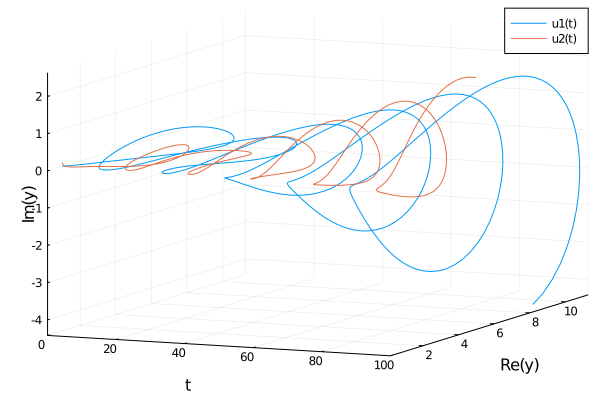

In [45]:
plot(sol)